In [214]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Objective: Build a model to predict the State of a Kickstarter project, which can be one of two classes: "Failed" or "Successful".

### Step 1: Data Collection  & Initial Cleaning

In [215]:
df = pd.read_csv('../data/kickstarter_projects.csv')

In [216]:
# Basic Overview
print(df.shape)
print(df.info())

(374853, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB
None


In [217]:
# Standardize column names
df.columns = df.columns.str.lower()
print("Column names:", df.columns.tolist())

Column names: ['id', 'name', 'category', 'subcategory', 'country', 'launched', 'deadline', 'goal', 'pledged', 'backers', 'state']


In [218]:
# Check duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [219]:
# Show state distribution (before filtering)
state_dist = df['state'].value_counts(normalize=True) * 100
print("Initial state distribution (%):\n", round(state_dist, 2))

Initial state distribution (%):
 state
Failed        52.72
Successful    35.71
Canceled      10.34
Live           0.75
Suspended      0.49
Name: proportion, dtype: float64


In [220]:
# Filter only for 'Successful' and 'Failed' projects
df = df[df['state'].isin(['Successful', 'Failed'])]
print("After filtering:", df.shape)
print("Filtered state distribution (%):\n", round(df['state'].value_counts(normalize=True) * 100, 2))

After filtering: (331462, 11)
Filtered state distribution (%):
 state
Failed        59.62
Successful    40.38
Name: proportion, dtype: float64


### Step 2: Exploratory Data Analysis (EDA)

In [ ]:
# 1. State distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='state', data=df)
plt.title('Distribution of Kickstarter Project States')
plt.xlabel('Project State')
plt.ylabel('Number of Projects')
plt.show()

# 2. Goal by State
plt.figure(figsize=(10, 5))
sns.boxplot(x='state', y='goal', data=df)
plt.title('Goal Amount by Project State')
plt.show()

# 3. Category vs State
plt.figure(figsize=(14, 6))
sns.countplot(x='category', hue='state', data=df, order=df['category'].value_counts().index)
plt.title('Project State by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [221]:
# Duration Feature Engineering
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration'] = (df['deadline'] - df['launched']).dt.days

print("Campaign Duration Summary:\n", round(df['duration'].describe(), 2))


Campaign Duration Summary:
 count    331462.00
mean         32.96
std          12.71
min           0.00
25%          29.00
50%          29.00
75%          35.00
max          91.00
Name: duration, dtype: float64


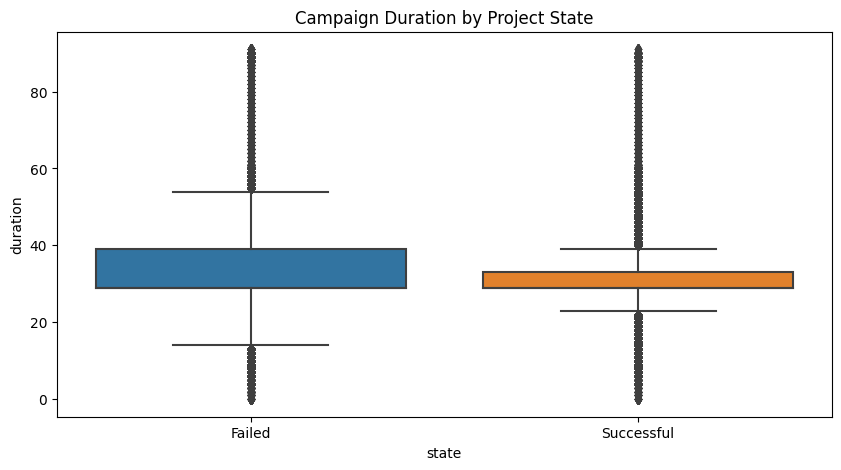

In [222]:
# Duration by State
plt.figure(figsize=(10, 5))
sns.boxplot(x='state', y='duration', data=df)
plt.title('Campaign Duration by Project State')
plt.show()

In [223]:
# Summary stats for numerical columns
print("Summary statistics for goal, pledged, and backers:")
print(df[['goal', 'pledged', 'backers']].describe())

Summary statistics for goal, pledged, and backers:
               goal       pledged        backers
count  3.314620e+05  3.314620e+05  331462.000000
mean   4.152286e+04  9.939993e+03     116.456315
std    1.109279e+06  9.664561e+04     965.732911
min    0.000000e+00  0.000000e+00       0.000000
25%    2.000000e+03  5.000000e+01       2.000000
50%    5.000000e+03  7.880000e+02      15.000000
75%    1.500000e+04  4.609000e+03      63.000000
max    1.663614e+08  2.033899e+07  219382.000000


In [224]:
# Check for data quality issues
print("Rows with goal <= 0:", len(df[df['goal'] <= 0]))
print("Rows with duration == 0:", len(df[df['duration'] == 0]))

Rows with goal <= 0: 3
Rows with duration == 0: 92


In [225]:
# Remove rows where goal is less than or equal to 0 OR duration is 0
df = df[(df['goal'] > 0) & (df['duration'] != 0)]

# Confirm the new shape
print("New shape after removing invalid rows:", df.shape)


New shape after removing invalid rows: (331368, 12)


In [226]:
# Save filtered dataset
df.to_csv('../data/kickstarter_common.csv', index=False)

In [231]:
# Reload from CSV
df = pd.read_csv('../data/kickstarter_common.csv')
print("Reloaded shape:", df.shape)
print("Reloaded state distribution (%):\n", round(df['state'].value_counts(normalize=True) * 100, 2))

Reloaded shape: (331368, 12)
Reloaded state distribution (%):
 state
Failed        59.62
Successful    40.38
Name: proportion, dtype: float64
